<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [3]:
#read the output file
df = pd.read_csv("output2D.csv")
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8000 non-null   int64  
 1   n                          8000 non-null   int64  
 2   m                          8000 non-null   int64  
 3   Dimension                  8000 non-null   object 
 4   Distribution               8000 non-null   object 
 5   OPT                        8000 non-null   object 
 6   Plurality                  8000 non-null   object 
 7   Plurality Distortion       8000 non-null   float64
 8   Copeland                   8000 non-null   object 
 9   Copeland Distortion        8000 non-null   float64
 10  STV                        8000 non-null   object 
 11  STV Distortion             8000 non-null   object 
 12  Borda                      8000 non-null   object 
 13  Borda Distortion           8000 non-null   float

In [4]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      8000 non-null   int64  
 1   n                          8000 non-null   int64  
 2   m                          8000 non-null   int64  
 3   Dimension                  8000 non-null   object 
 4   Distribution               8000 non-null   object 
 5   OPT                        8000 non-null   object 
 6   Plurality                  8000 non-null   object 
 7   Plurality Distortion       8000 non-null   float64
 8   Copeland                   8000 non-null   object 
 9   Copeland Distortion        8000 non-null   float64
 10  STV                        8000 non-null   object 
 11  STV Distortion             6904 non-null   float64
 12  Borda                      8000 non-null   object 
 13  Borda Distortion           8000 non-null   float

In [5]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,2D,normal,Candidate 4,Candidate 4,1.000000,Candidate 4,1.0,Candidate 4,1.000000,Candidate 2,1.153542,Candidate 4,1.0,Candidate 4,1.0
1,1,200,5,2D,normal,Candidate 0,Candidate 0,1.000000,Candidate 0,1.0,Candidate 0,1.000000,Candidate 3,1.038423,Candidate 0,1.0,Candidate 0,1.0
2,2,200,5,2D,normal,Candidate 4,Candidate 2,1.005701,Candidate 4,1.0,Candidate 4,1.000000,Candidate 4,1.000000,Candidate 4,1.0,Candidate 4,1.0
3,3,200,5,2D,normal,Candidate 3,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0
4,4,200,5,2D,normal,Candidate 3,Candidate 4,1.141214,Candidate 3,1.0,Candidate 1,1.034236,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0


In [6]:
#group by distribution, n, m
group_by_all = df.groupby(["Distribution", "n", "m"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [7]:
group_by_all

Plurality_Distortion_avg  Plurality_Distortion_max  \
Distribution n   m                                                         
bimodal      200 5                    1.114438                  1.675051   
                 10                   1.133885                  1.478399   
                 50                   1.191540                  1.525122   
                 100                  1.222121                  1.707811   
normal       200 5                    1.037770                  1.550991   
                 10                   1.100990                  1.565209   
                 50                   1.276097                  2.218464   
                 100                  1.317478                  2.345222   
poisson      200 5                    1.041479                  1.526071   
                 10                   1.105189                  1.556544   
                 50                   1.243868                  1.787028   
                 100                  1.254695                  1.986963   
uniform      200 5                    1.061142                  1.473934   
                 10                   1.150051                  1.712218   
                 50                   1.314822                  1.882678   
                 100                  1.345172                  1.971372   

                      Copeland_Distortion_avg  Copeland_Distortion_max  \
Distribution n   m                                                       
bimodal      200 5                   1.017264                 1.266136   
                 10                  1.011284                 1.157650   
                 50                  1.008721                 1.107508   
                 100                 1.006862                 1.090385   
normal       200 5                   1.000701                 1.039030   
                 10                  1.000772                 1.039912   
                 50                  1.000613                 1.017079   
                 100                 1.000685                 1.016593   
poisson      200 5                   1.000998                 1.060357   
                 10                  1.001500                 1.051417   
                 50                  1.002023                 1.033406   
                 100                 1.001925                 1.023956   
uniform      200 5                   1.000941                 1.049815   
                 10                  1.000851                 1.052093   
                 50                  1.000918                 1.032063   
                 100                 1.000709                 1.019312   

                      STV_Distortion_avg  STV_Distortion_max  \
Distribution n   m                                             
bimodal      200 5              1.051496            1.413205   
                 10             1.086380            1.370907   
                 50             1.118424            1.305535   
                 100            1.125666            1.323324   
normal       200 5              1.005667            1.181381   
                 10             1.030165            1.214113   
                 50             1.073010            1.319238   
                 100            1.078769            1.286402   
poisson      200 5              1.007679            1.196203   
                 10             1.033822            1.234885   
                 50             1.068003            1.268001   
                 100            1.080782            1.292670   
uniform      200 5              1.013616            1.214622   
                 10             1.045134            1.338943   
                 50             1.111526            1.368435   
                 100            1.111630            1.389891   

                      Borda_Distortion_avg  Borda_Distortion_max  \
Distribution n   m                                                 
bimodal      200 5             

In [8]:
group_by_distribution  = df.groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))

In [9]:
group_by_distribution

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
Distribution,,,,,,,,,,,,
bimodal,1.165496,1.707811,1.011033,1.266136,1.094301,1.413205,1.046228,1.393399,1.005877,1.170085,1.018639,1.266136
normal,1.183084,2.345222,1.000693,1.039912,1.046920,1.319238,1.002714,1.171585,1.003409,1.091807,1.005496,1.144638
poisson,1.161308,1.986963,1.001612,1.060357,1.047519,1.292670,1.003603,1.221651,1.005833,1.097762,1.005884,1.099117
uniform,1.217797,1.971372,1.000855,1.052093,1.070272,1.389891,1.003888,1.281032,1.001569,1.091412,1.008379,1.111301


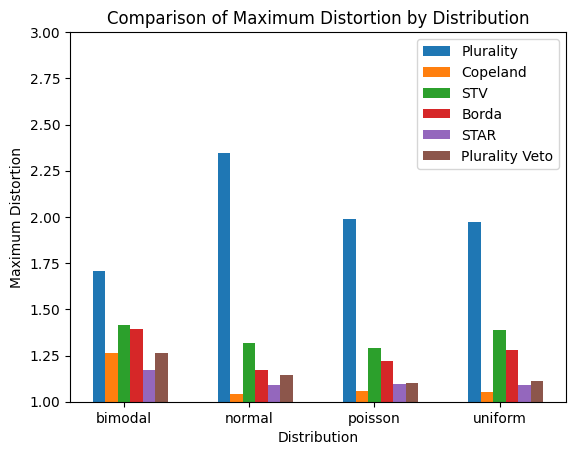

In [10]:

# Extract the data
distribution = group_by_distribution.index
plurality_max = group_by_distribution["Plurality_Distortion_max"]
copeland_max = group_by_distribution["Copeland_Distortion_max"]
stv_max = group_by_distribution["STV_Distortion_max"]
borda_max = group_by_distribution["Borda_Distortion_max"]
star_max = group_by_distribution["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Maximum Distortion")
plt.title("Comparison of Maximum Distortion by Distribution")
plt.xticks(x, distribution)
plt.ylim(1,3)
plt.legend()

# Show the plot
plt.show()



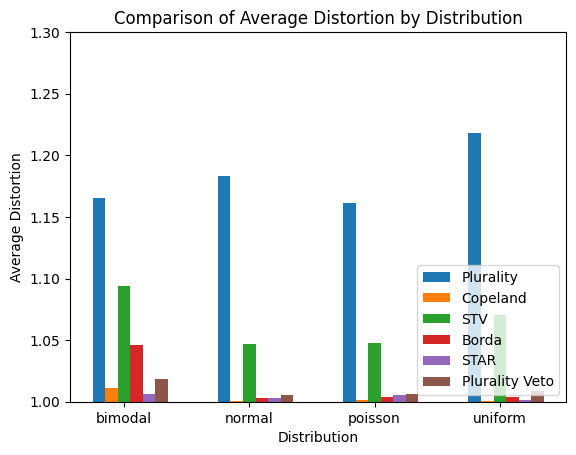

In [11]:
# Extract the data
distribution = group_by_distribution.index
plurality_avg = group_by_distribution["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution["Copeland_Distortion_avg"]
stv_avg = group_by_distribution["STV_Distortion_avg"]
borda_avg = group_by_distribution["Borda_Distortion_avg"]
star_avg = group_by_distribution["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Average Distortion")
plt.title("Comparison of Average Distortion by Distribution")
plt.xticks(x, distribution)
plt.ylim(1,1.3)
plt.legend(loc='lower right')




In [12]:
group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
m,,,,,,,,,,,,
5,1.063707,1.675051,1.004976,1.266136,1.015769,1.413205,1.015173,1.393399,1.002392,1.132116,1.005901,1.266136
10,1.122529,1.712218,1.003602,1.157650,1.043220,1.370907,1.015223,1.331702,1.002944,1.170085,1.009330,1.257021
50,1.256582,2.218464,1.003069,1.107508,1.089344,1.368435,1.012832,1.147414,1.005226,1.078203,1.011088,1.135354
100,1.284867,2.345222,1.002545,1.090385,1.095340,1.389891,1.013204,1.129892,1.006061,1.097762,1.012078,1.129675


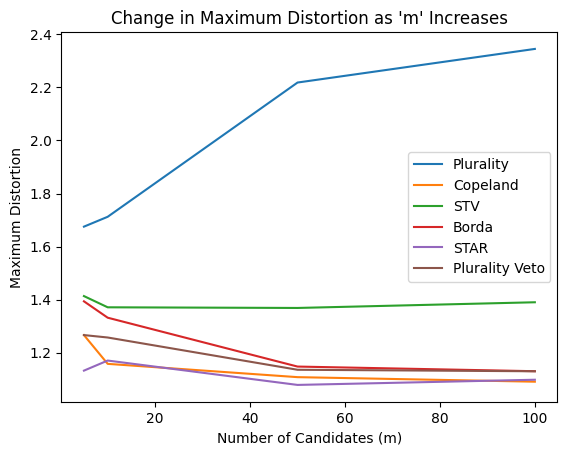

In [13]:
plt.plot(group_by_m.index, group_by_m["Plurality_Distortion_max"], label="Plurality")
plt.plot(group_by_m.index, group_by_m["Copeland_Distortion_max"], label="Copeland")
plt.plot(group_by_m.index, group_by_m["STV_Distortion_max"], label="STV")
plt.plot(group_by_m.index, group_by_m["Borda_Distortion_max"], label="Borda")
plt.plot(group_by_m.index, group_by_m["STAR_Distortion_max"], label="STAR")
plt.plot(group_by_m.index, group_by_m["PluralityVeto_Distortion_max"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candidates (m)")
plt.ylabel("Maximum Distortion")
plt.title("Change in Maximum Distortion as 'm' Increases")
plt.legend()


# Show the plot
plt.show()

In [38]:
# group_by_n = df.groupby("n").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"))
# group_by_n

,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max
n,,,,,,,,,,
200,1.178425,2.100644,1.003883,1.230713,1.059872,1.358281,1.013893,1.311625,1.004066,1.158441


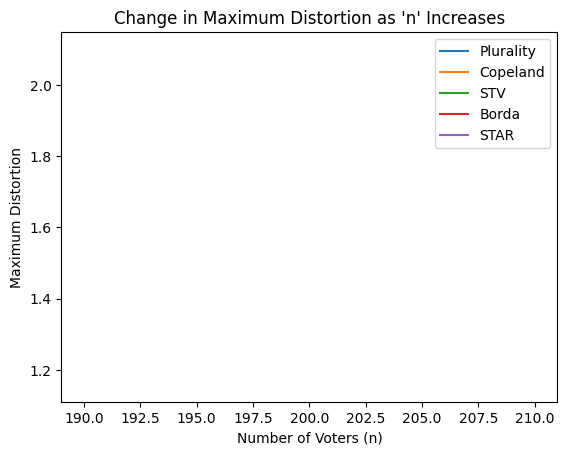

In [39]:
# plt.plot(group_by_n.index, group_by_n["Plurality_Distortion_max"], label="Plurality")
# plt.plot(group_by_n.index, group_by_n["Copeland_Distortion_max"], label="Copeland")
# plt.plot(group_by_n.index, group_by_n["STV_Distortion_max"], label="STV")
# plt.plot(group_by_n.index, group_by_n["Borda_Distortion_max"], label="Borda")
# plt.plot(group_by_n.index, group_by_n["STAR_Distortion_max"], label="STAR")

# # Customize the plot
# plt.xlabel("Number of Voters (n)")
# plt.ylabel("Maximum Distortion")
# plt.title("Change in Maximum Distortion as 'n' Increases")
# plt.legend()


# # Show the plot
# plt.show()

In [14]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution = df.groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

In [15]:
accuracy_by_distribution

,Distribution,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
0,bimodal,8.05,60.95,7.50,59.60,22.65,44.25
1,normal,24.10,87.05,37.30,67.65,82.10,64.60
2,poisson,25.25,81.55,36.65,59.75,74.95,65.70
3,uniform,18.80,87.35,33.45,78.65,79.95,62.65


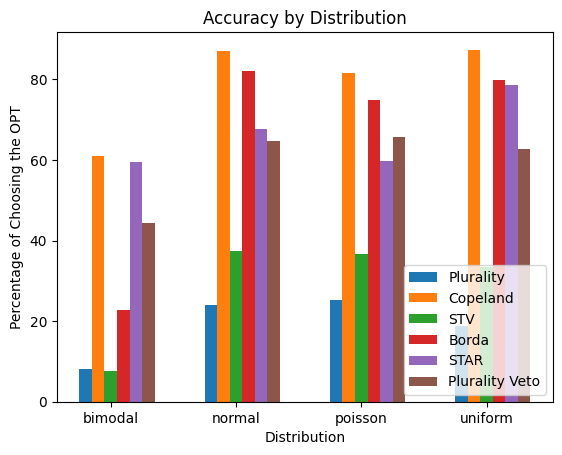

In [16]:
# Extract the data
distribution = accuracy_by_distribution["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution["Borda_percentage"], width=bar_width, label="Borda")
plt.bar(x + 2 * bar_width, accuracy_by_distribution["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 3 * bar_width, accuracy_by_distribution["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Accuracy by Distribution")
plt.xticks(x, distribution)
plt.legend(loc='lower right')


In [75]:
# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_m = df.groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)
)
accuracy_by_m

,Plurality_percentage,Copeland_percentage,STV_percentage,STAR_percentage,Borda_percentage,PluralityVeto_percentage
m,,,,,,
5,49.05,87.85,66.45,86.25,78.55,83.15
10,20.95,85.65,37.55,81.55,70.90,72.55
50,3.75,74.25,6.70,55.65,57.05,47.55
100,2.45,69.15,4.20,42.20,53.15,33.95


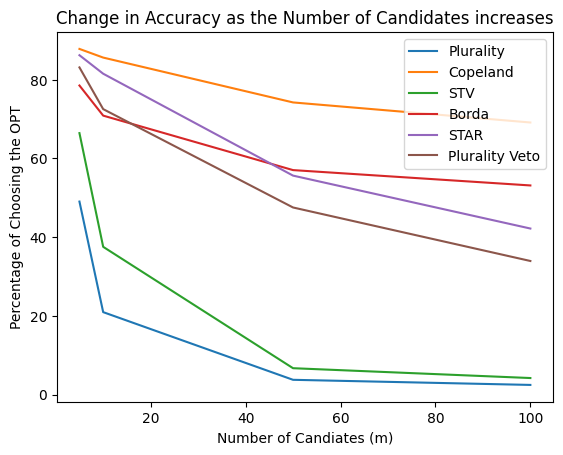

In [77]:
plt.plot(accuracy_by_m.index, accuracy_by_m["Plurality_percentage"], label="Plurality")
plt.plot(accuracy_by_m.index, accuracy_by_m["Copeland_percentage"], label="Copeland")
plt.plot(accuracy_by_m.index, accuracy_by_m["STV_percentage"], label="STV")
plt.plot(accuracy_by_m.index, accuracy_by_m["Borda_percentage"], label="Borda")
plt.plot(accuracy_by_m.index, accuracy_by_m["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m.index, accuracy_by_m["PluralityVeto_percentage"], label="Plurality Veto")

# Customize the plot
plt.xlabel("Number of Candiates (m)")
plt.ylabel("Percentage of Choosing the OPT")
plt.title("Change in Accuracy as the Number of Candidates increases")
plt.legend()


# Show the plot
plt.show()